In [445]:
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from math import cos, pi
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import levinson_durbin
from Levinson_Durbin.levinson import levinson_1d
import IPython

In [446]:
# Weight for flattening edges
def weight(i: int):
    return 0.5*(1-cos(((2*pi) / (257)) * i))

In [447]:
# Check if last 10 smaples from previous segment
# fir first 10 samples from current segment
def check_samples(segments: np.ndarray):
    for i in range(1,len(segments)):
        if list(segments[i-1][-10:]) != list(segments[i][:10]):
            print('\033[91m' + "X Test 1 Failed")
            print(f"List #{i-1} is diff with list #{i}")
    print('\033[92m' + f"\u2713 Test Passed")

In [448]:
def play_sound(sound, rate=11025):
    return  IPython.display.display(IPython.display.Audio(sound, rate=rate))
# Read wave file
track, fs = sf.read("data/01.wav")

play_sound(track[:])


(array([[4.62055571e-16, 4.66802140e-15, 5.83068033e-15, ...,
         2.97899976e-08, 6.10711716e-09, 6.43565587e-09],
        [1.20600157e-14, 2.61203130e-15, 4.34569778e-15, ...,
         1.43575478e-07, 4.00727449e-08, 1.25366771e-08],
        [3.39977054e-15, 1.82536646e-15, 6.30105840e-16, ...,
         1.84028861e-08, 2.27256226e-08, 3.05275311e-08],
        ...,
        [7.78530960e-12, 1.08669877e-11, 4.36559365e-11, ...,
         1.49187790e-09, 2.79682071e-06, 1.58887545e-06],
        [5.43831055e-11, 3.02893484e-11, 4.38738322e-11, ...,
         1.52823370e-09, 1.70265383e-06, 1.05708607e-06],
        [6.24042927e-12, 2.03939890e-11, 4.19493981e-12, ...,
         5.87810463e-10, 1.17218164e-07, 1.93440216e-08]]),
 array([   0.        ,   10.76660156,   21.53320312,   32.29980469,
          43.06640625,   53.83300781,   64.59960938,   75.36621094,
          86.1328125 ,   96.89941406,  107.66601562,  118.43261719,
         129.19921875,  139.96582031,  150.73242188,  161.499

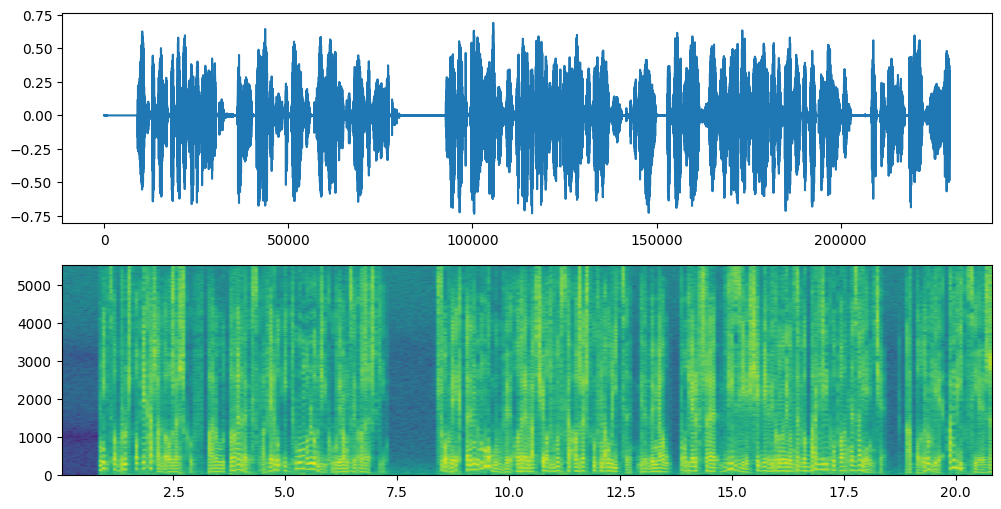

In [449]:
# Ploting track with specgram
plt.figure(figsize=(12,6))

plt.subplot(2, 1, 1)
plt.plot(track)

plt.subplot(2, 1, 2)
plt.specgram(track, NFFT=1024, Fs=fs)

# plt.show()

In [450]:
# Creating segments with 256 samples 
segments_clear = [track[:256]]
for i in range(256, len(track), 256):
    segments_clear.append(track[i-10 : i+256])

In [451]:
# Adding 0 to fit 256
last_seg_len = (len(segments_clear[-1]) - 256 ) * -1
if last_seg_len > 0:
    segments_clear[-1] = np.append(segments_clear[-1], [0]*last_seg_len)

In [452]:
# Check if last 10 samples from previus segment
# fit first 10 samples from current segment
check_samples(segments_clear)

✓ Test Passed


In [453]:
# Create segments model with zeros 
segments_model = []

In [454]:
for idx, lst in enumerate(segments_clear):
    lst[0] = weight(1)
    lst[-1] = weight(256)
    segments_model.append(np.random.normal(0,1,10))
    segments_model[idx] = np.append(segments_model[idx], lst)
    segments_model[idx] = np.append(segments_model[idx], np.random.normal(0,1,10))

In [455]:
ld_arcoefs = []

In [456]:
# Imported from LD
for x in range(0, len(segments_model)):
    sigma_v, arcoefs, pacf, sigma, phi = levinson_durbin(segments_model[x],10)
    ld_arcoefs.append(arcoefs)

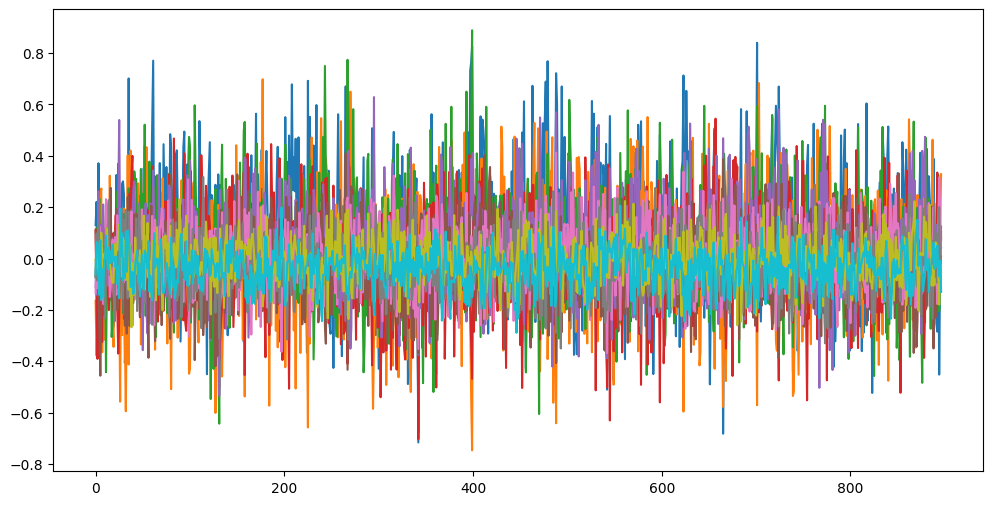

In [457]:
plt.figure(figsize=(12,6))

plt.plot(ld_arcoefs)

plt.show()